In [0]:
!pip install nltk
!pip install twython

In [0]:
import pandas as pd, numpy as np, itertools
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
DF=pd.DataFrame
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from os.path import join

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\950285\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 22

In [0]:
fig_path = r'C:\Users\950285\Google Drive\school\SU_Data_Science\IST718_big_data_analytics\final_project\figures'

In [0]:
t_path = r'C:\Users\950285\Google Drive\school\SU_Data_Science\IST718_big_data_analytics\final_project\data\Tweets_ALL_Format.csv'
p_path = r'C:\Users\950285\Google Drive\school\SU_Data_Science\IST718_big_data_analytics\final_project\data\rev1\data\approval_polllist.csv'
mdf=pd.read_csv(t_path)
pollist=pd.read_csv(p_path)

In [0]:
mdf['dtg']=pd.to_datetime(mdf['created_date'])
mdf['pmonth']=mdf.dtg.dt.to_period('M')
mdf['pweek']=mdf.dtg.dt.to_period('W')
mdf['pdate']=mdf.dtg.dt.to_period('D')
mdf['phour']=mdf.dtg.dt.to_period('H')
mdf['hour']=mdf.dtg.dt.hour
mdf['dow']=mdf.dtg.dt.weekday
mdf['day_name']=mdf.dtg.dt.weekday_name
mdf['has_witch']=mdf['text'].str.contains('witch',case=False)
mdf['has_fake_news']=mdf['text'].str.contains('fake news',case=False)
mdf['has_witch_or_fake_news'] = mdf['has_witch'] | mdf['has_fake_news']

In [0]:
pollist['edtg']=pd.to_datetime(pollist['enddate'])
pollist['pmonth']=pollist.edtg.dt.to_period('M')
pollist['pweek']=pollist.edtg.dt.to_period('W')
pollist['pdate']=pollist.edtg.dt.to_period('D')
pollist['phour']=pollist.edtg.dt.to_period('H')
pollist['hour']=pollist.edtg.dt.hour
pollist['dow']=pollist.edtg.dt.weekday
pollist['day_name']=pollist.edtg.dt.weekday_name
pollist=pollist[pollist.subgroup=='All polls']

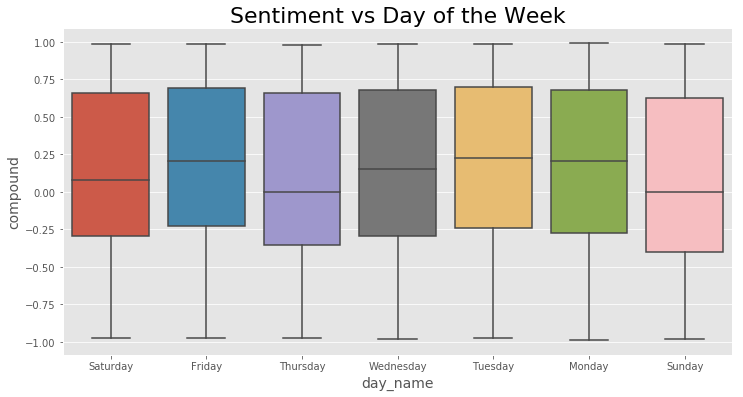

In [0]:
ax=sns.boxplot(data=mdf,x='day_name',y='compound')
ax.set_title('Day of Week VS. Compound Sentiment Score')
ax.set_title('Sentiment vs Day of the Week')
plt.savefig(fig_path+r'\sentiment_vs_dow.png')

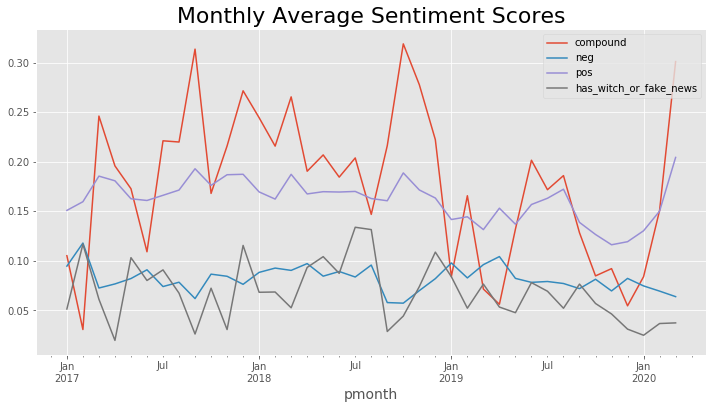

Text(0.5, 1.0, 'Weekly Average Sentiment Scores')

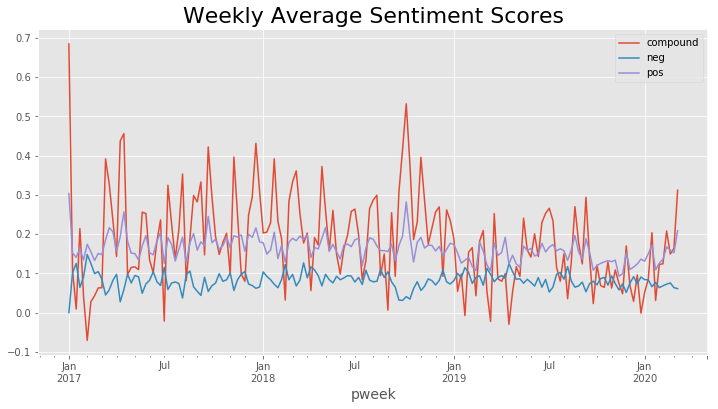

In [0]:
gdf=mdf.groupby('pmonth').mean()
ax=gdf[['compound','neg','pos','has_witch_or_fake_news']].plot()
ax.set_title('Monthly Average Sentiment Scores')
plt.show()
gdf=mdf.groupby('pweek').mean()
ax=gdf[['compound','neg','pos']].plot()
ax.set_title('Weekly Average Sentiment Scores')

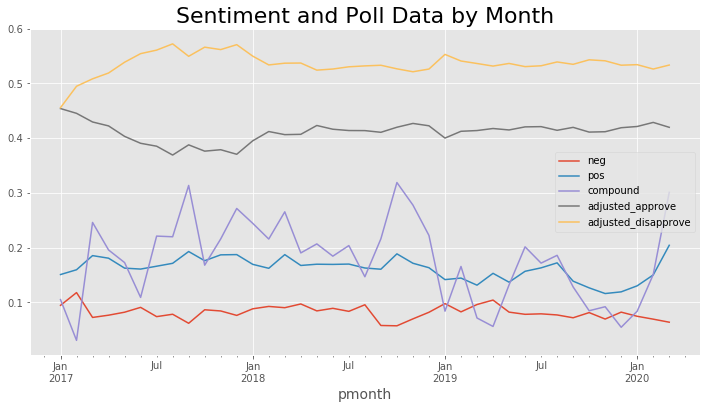

In [0]:
gb = ['pmonth']

gdf = mdf.groupby(gb)[['neg','pos','compound']].mean()
pgdf=pollist.groupby(gb)[['adjusted_approve','adjusted_disapprove']].mean()/100

ax=gdf.join(pgdf).plot()
ax.set_title('Sentiment and Poll Data by Month')
plt.savefig(fig_path+r'\sentiment_poll_by_month.png')

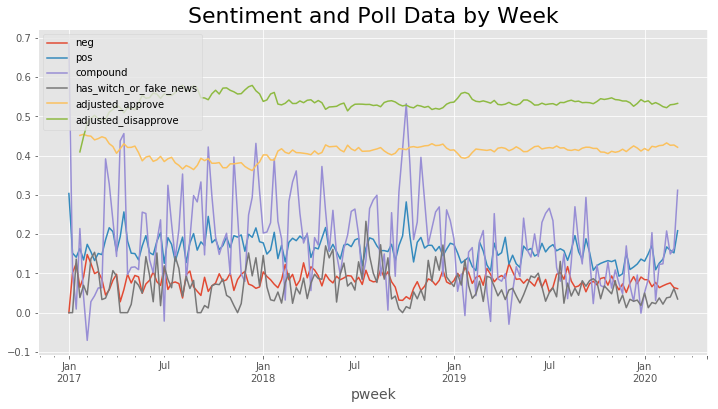

In [0]:
gb = ['pweek']

gdf = mdf.groupby(gb)[['neg','pos','compound','has_witch_or_fake_news']].mean()
pgdf=pollist.groupby(gb)[['adjusted_approve','adjusted_disapprove']].mean()/100

odf=gdf.join(pgdf)
ax=odf.plot()

ax.set_title('Sentiment and Poll Data by Week')
plt.savefig(fig_path+r'\sentiment_poll_by_week.png')

odf['tweet_count'] = mdf.groupby(gb)['text'].count()

C:\Users\950285\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


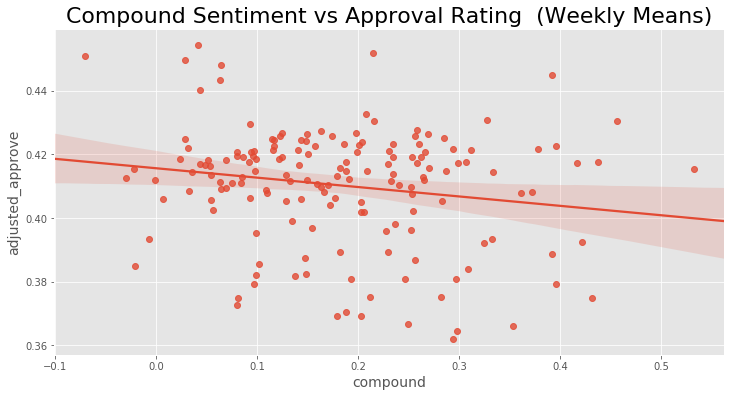

In [0]:
aax=sns.regplot(data=odf,x='compound',y='adjusted_approve')
plt.title('Compound Sentiment vs Approval Rating  (Weekly Means)')
plt.savefig(fig_path+r'\compound_vs_approval.png')

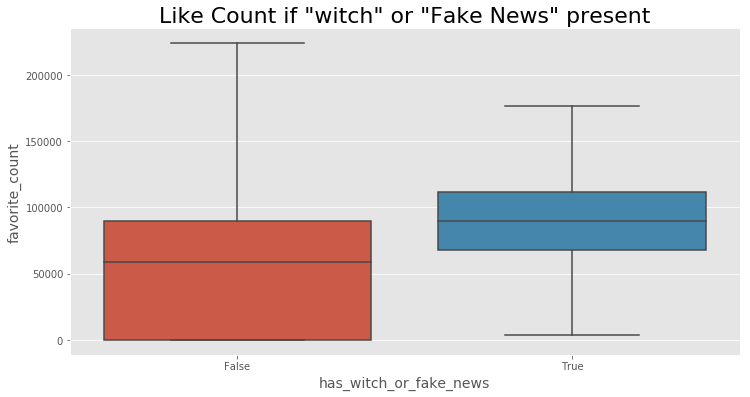

In [0]:
ax=sns.boxplot(data=mdf,x='has_witch_or_fake_news',y='favorite_count',showfliers=False)
ax.set_title('Like Count if "witch" or "Fake News" present')
plt.savefig(fig_path+r'\like_count_witch_fake_news.png')

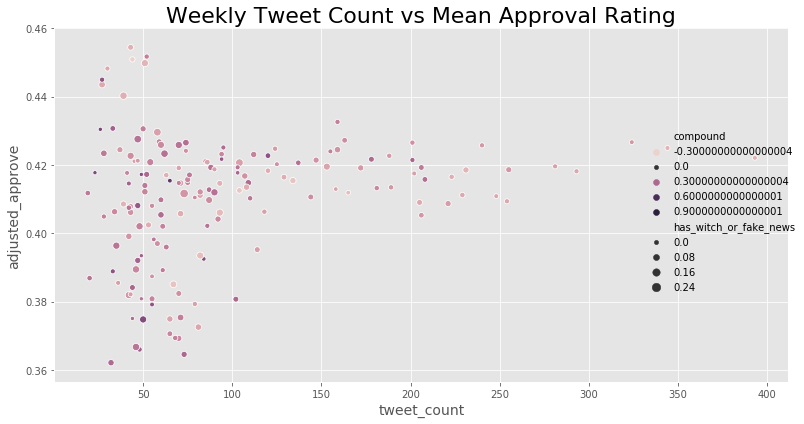

In [0]:
ax=sns.relplot(data=odf,x='tweet_count',y='adjusted_approve',hue='compound',size='has_witch_or_fake_news',height=6,aspect=1.5)
plt.title('Weekly Tweet Count vs Mean Approval Rating')
plt.tight_layout()
plt.savefig(fig_path+r'\tweet_count_vs_approval.png')
plt.show()

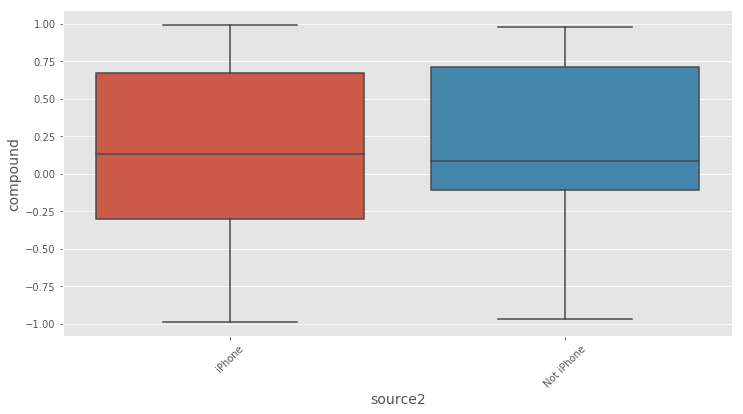

In [0]:
def cat_source(source):
    if 'iPhone' in source:
        return 'iPhone'
    else:
        return 'Not iPhone'

    
mdf['source2']=mdf['source'].map(cat_source)
g=sns.boxplot(data=mdf,x='source2',y='compound')
plt.xticks(rotation=45)
plt.savefig(fig_path+r'\sentiment_vs_source_boxplot.png')

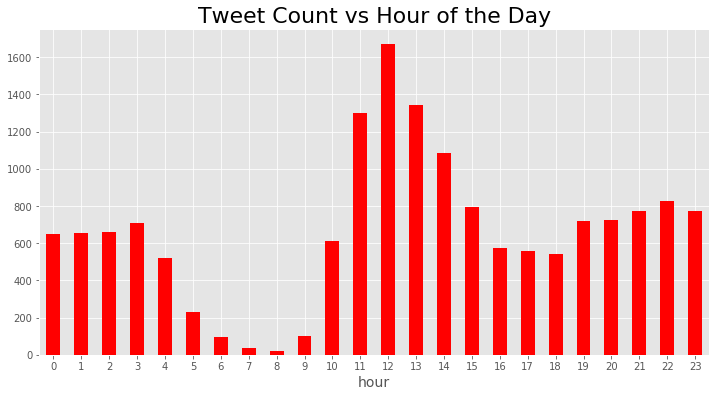

In [0]:
ax=mdf.groupby(['hour'])['text'].count().plot(kind='bar',color='red')
ax.set_title('Tweet Count vs Hour of the Day')
plt.xticks(rotation=0)
plt.savefig(fig_path+r'\tweet_count_by_hour_of_day.png')

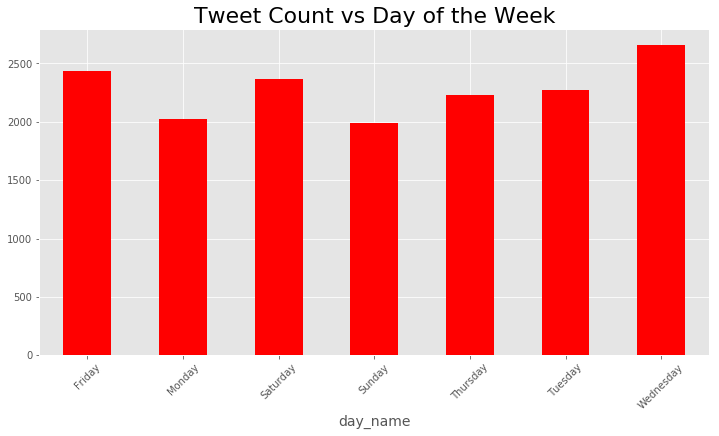

In [0]:
ax=mdf.groupby('hour')['text'].count().plot(kind='bar',color='red')
ax.set_title('Tweet Count vs Day of the Week')
mdf.groupby('day_name')['text'].count().plot(kind='bar',color='red')
plt.xticks(rotation=45)
plt.savefig(fig_path+r'\tweet_count_by_day_of_week.png')

In [0]:
mdf

,created_date,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,sentiment,neg,...,pmonth,pweek,pdate,phour,dow,day_name,has_witch,has_fake_news,has_witch_or_fake_news,source2
0,3/7/2020 3:45,Twitter for iPhone,Thank you @GovBillLee and @MariaLeeTN. My Admi...,3/7/2020 3:45,9221,37544,False,1.236140e+18,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.000,...,2020-03,2020-03-02/2020-03-08,2020-03-07,2020-03-07 03:00,5,Saturday,False,False,False,iPhone
1,3/7/2020 1:08,Twitter for iPhone,....I want to thank Acting Chief Mick Mulvaney...,3/7/2020 1:08,12193,57450,False,1.236100e+18,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",0.000,...,2020-03,2020-03-02/2020-03-08,2020-03-07,2020-03-07 01:00,5,Saturday,False,False,False,iPhone
2,3/7/2020 1:08,Twitter for iPhone,I am pleased to announce that Congressman Mark...,3/7/2020 1:08,23997,108097,False,1.236100e+18,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.000,...,2020-03,2020-03-02/2020-03-08,2020-03-07,2020-03-07 01:00,5,Saturday,False,False,False,iPhone
3,3/7/2020 0:19,Twitter for iPhone,Congratulations to @FoxNews! https://t.co/ED5t...,3/7/2020 0:19,17632,78051,False,1.236080e+18,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.000,...,2020-03,2020-03-02/2020-03-08,2020-03-07,2020-03-07 00:00,5,Saturday,False,False,False,iPhone
4,3/6/2020 21:21,Twitter for iPhone,https://t.co/TZ6o5jjPH7,3/6/2020 21:21,10410,41426,False,1.236040e+18,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,...,2020-03,2020-03-02/2020-03-08,2020-03-06,2020-03-06 21:00,4,Friday,False,False,False,iPhone
5,3/6/2020 21:18,Twitter for iPhone,Thank you @GovBillLee. We are a phone call awa...,3/6/2020 21:18,9980,40143,False,1.236040e+18,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.000,...,2020-03,2020-03-02/2020-03-08,2020-03-06,2020-03-06 21:00,4,Friday,False,False,False,iPhone
6,3/6/2020 20:59,Twitter for iPhone,My Administration is with you all of the way T...,3/6/2020 20:59,16487,74153,False,1.236030e+18,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...",0.000,...,2020-03,2020-03-02/2020-03-08,2020-03-06,2020-03-06 20:00,4,Friday,False,False,False,iPhone
7,3/6/2020 15:47,Twitter for iPhone,Spoke to Governor @GavinNewsom early this morn...,3/6/2020 15:47,12185,47145,False,1.235960e+18,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,...,2020-03,2020-03-02/2020-03-08,2020-03-06,2020-03-06 15:00,4,Friday,False,False,False,iPhone
8,3/6/2020 15:38,Twitter for iPhone,It is FAKE NEWS that @HHSGov @SecAzar is side...,3/6/2020 15:38,14178,58508,False,1.235950e+18,"{'neg': 0.074, 'neu': 0.71, 'pos': 0.217, 'com...",0.074,...,2020-03,2020-03-02/2020-03-08,2020-03-06,2020-03-06 15:00,4,Friday,False,True,True,iPhone
9,3/6/2020 15:08,Twitter for iPhone,I will protect your Social Security and Medica...,3/6/2020 15:08,31038,142608,False,1.235950e+18,"{'neg': 0.093, 'neu': 0.767, 'pos': 0.14, 'com...",0.093,...,2020-03,2020-03-02/2020-03-08,2020-03-06,2020-03-06 15:00,4,Friday,False,False,False,iPhone
